In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 99% 608M/612M [00:18<00:00, 40.0MB/s]
100% 612M/612M [00:18<00:00, 35.4MB/s]


In [3]:
import zipfile
zp = zipfile.ZipFile('/content/gtsrb-german-traffic-sign.zip')
zp.extractall('/content')
zp.close()

In [5]:
import os
import shutil
import random
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from keras. layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization , Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [16]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define base directory and train/test directories
base_dir = '/content/Data'
train_dir = '/content/train_data'
test_dir = '/content/test_data'

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through each class folder (0 to 42)
for class_folder in range(43):  # Assuming class folders are named 0 to 42
    class_folder = str(class_folder)

    # Create corresponding class folders in train and test directories
    os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)

    # Get list of images in the current class folder
    class_images = os.listdir(os.path.join(base_dir, class_folder))

    # Split the images into 80% train and 20% test
    train_images, test_images = train_test_split(class_images, test_size=0.2, random_state=42)

    # Function to move files from source to destination directories
    def move_files(file_list, source_dir, dest_dir):
        for file_name in file_list:
            source = os.path.join(source_dir, file_name)
            destination = os.path.join(dest_dir, file_name)
            shutil.move(source, destination)

    # Move images to respective train and test directories
    move_files(train_images, os.path.join(base_dir, class_folder), os.path.join(train_dir, class_folder))
    move_files(test_images, os.path.join(base_dir, class_folder), os.path.join(test_dir, class_folder))

print("Data has been successfully split into training and testing sets.")


Data has been successfully split into training and testing sets.


In [19]:
tl = VGG16(weights='imagenet',
    include_top = False,
    input_shape = (150,150,3))

train = keras.utils.image_dataset_from_directory(
    directory = '/content/train_data',
    labels = 'inferred',
    label_mode = 'int',
    image_size=(150,150)
)
test = keras.utils.image_dataset_from_directory(
    directory = '/content/test_data',
    labels = 'inferred',
    label_mode = 'int',
    image_size=(150,150)
)

def process(img,lab):
  img = tensorflow.cast(img/255.,tensorflow.float32)
  return img,lab

train = train.map(process)
test = test.map(process)

early_stopping = EarlyStopping( monitor = 'val_loss', patience=4, restore_best_weights=True)
model = Sequential()
model.add(tl)
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(43,activation='softmax'))
tl.trainable=False
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train,epochs=20,validation_data = test , callbacks = [early_stopping])


Found 31367 files belonging to 43 classes.
Found 7842 files belonging to 43 classes.
Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 106s 94ms/step - accuracy: 0.5727 - loss: 1.4938 - val_accuracy: 0.8298 - val_loss: 0.5567
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 126s 90ms/step - accuracy: 0.8560 - loss: 0.4677 - val_accuracy: 0.8628 - val_loss: 0.4440
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 142s 90ms/step - accuracy: 0.8980 - loss: 0.3201 - val_accuracy: 0.8908 - val_loss: 0.3460
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 142s 90ms/step - accuracy: 0.9180 - loss: 0.2512 - val_accuracy: 0.9194 - val_loss: 0.2572
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 88s 90ms/step - accuracy: 0.9318 - loss: 0.2104 - val_accuracy: 0.9374 - val_loss: 0.2052
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 85ms/step - accuracy: 0.9393 - loss: 0.1900 - val_accuracy: 0.9397 - val_loss: 0.1913
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 88s 89ms/step - accuracy: 0.9516 - loss: 0.1479 - val_accuracy: 0.9072 - val_loss: 0.3278
E

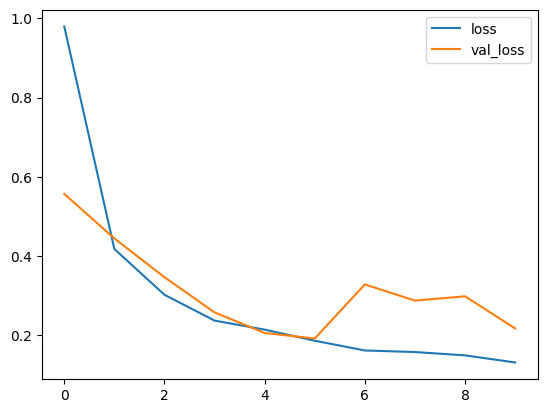

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

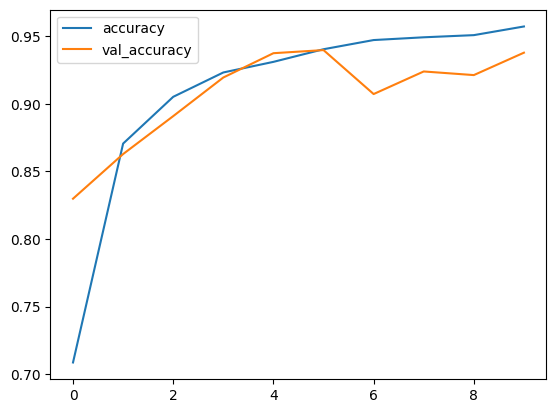

In [25]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [22]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 300)                 │       2,457,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 43)                  │           6,493 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,243,319 (84.85 MB)

 Trainable params: 2,509,543 (9.57 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 5,019,088 (19.15 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


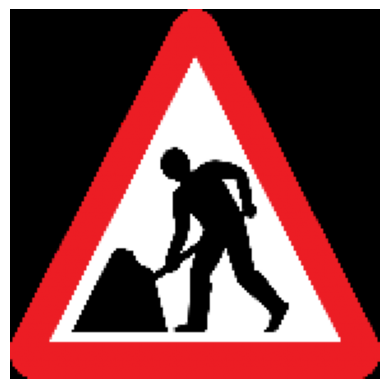

[[3.03208314e-17 1.19902927e-16 2.34473791e-17 7.19291506e-08
  1.35635036e-12 3.32697671e-12 1.59575871e-20 1.01755746e-21
  6.62418069e-21 1.76825769e-21 3.91935182e-12 4.43249520e-10
  3.63425381e-14 7.49235260e-05 7.45047259e-08 3.39651796e-09
  1.48206358e-13 4.63810379e-11 9.99917865e-01 2.10197777e-06
  4.71958720e-06 6.48225362e-11 2.97546085e-11 7.54342979e-16
  2.60579284e-11 1.52676947e-07 4.71243606e-19 6.32362218e-10
  3.40059068e-19 6.52671559e-19 7.49618388e-16 1.00047784e-13
  2.46725265e-14 1.09936542e-13 2.62843853e-16 7.90515832e-20
  2.17553996e-15 2.56707009e-13 4.55992929e-19 1.35469378e-15
  1.35641487e-16 4.67008439e-16 2.99904694e-16]]


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


test_img2 = cv2.imread('/content/w1.png')


test_img2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2RGB)


test_img2 = cv2.resize(test_img2, (150, 150))


test_img2 = test_img2 / 255.0


test_dt1 = test_img2.reshape((1, 150, 150, 3))


pred = model.predict(test_dt1)


plt.imshow(test_img2)
plt.axis('off')
plt.show()


print(pred)


In [28]:
pr = np.argmax(pred)

In [29]:
pr

18

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


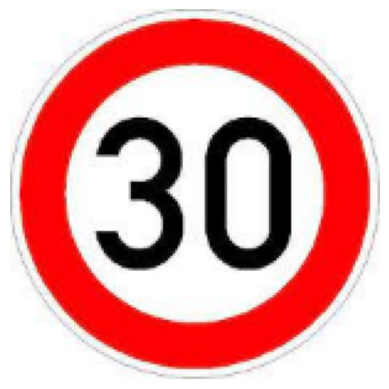

[[1.58589977e-08 3.74548428e-04 9.11990535e-12 4.54445611e-14
  1.19481312e-21 5.18155035e-19 6.04948553e-08 3.50216251e-19
  3.83322770e-15 2.68426272e-24 9.54763815e-14 3.16873318e-13
  9.99625325e-01 4.96503575e-14 1.54736612e-09 2.14208941e-17
  3.81676858e-15 1.83136866e-15 3.91321611e-12 1.61373660e-16
  1.49097981e-20 2.55340791e-18 2.10935095e-20 1.58841544e-08
  7.03392084e-14 3.01383513e-15 4.10032437e-17 2.95167002e-09
  1.05333138e-10 5.29970558e-15 1.59578446e-13 1.05502785e-11
  5.97374851e-13 3.01140731e-13 1.47944528e-08 1.03900299e-09
  6.29713389e-15 3.06646527e-13 3.46978349e-11 2.39974642e-12
  2.87255706e-13 1.68883033e-10 7.23775783e-16]]


12

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


test_img2 = cv2.imread('/content/w2.jpeg')


test_img2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2RGB)


test_img2 = cv2.resize(test_img2, (150, 150))


test_img2 = test_img2 / 255.0


test_dt1 = test_img2.reshape((1, 150, 150, 3))


pred = model.predict(test_dt1)


plt.imshow(test_img2)

plt.show()


print(pred)
pr = np.argmax(pred)
pr